### Point
Creating point is easy, you pass x and y coordinates into Point() -object (+ possibly also z -coordinate):

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

In [5]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


In [6]:
type(point1)

shapely.geometry.point.Point

Points and other shapely objects have useful built-in attributes and methods. Using the available attributes, we can for example extract the coordinate values of a Point and calculate the Euclidian distance between points.

In [7]:
point1.geom_type

'Point'

In [8]:
# Get xy coordinate tuple
list(point1.coords)

[(2.2, 4.2)]

In [47]:
# Read x and y coordinates separately
print(point1.x, point1.y)

2.2 4.2


Let’s calculate the distance between point1 and point2:

In [10]:
# Check input data
print(point1)
print(point2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


In [11]:
# Calculate the distance between point1 and point2
dist = point1.distance(point2)

# Print out a nicely formatted info message
print(f"Distance between the points is {dist} units")

Distance between the points is 29.723559679150142 units


### LineString
Creating LineString -objects is fairly similar to creating Shapely Points.

Now instead using a single coordinate-tuple we can construct the line using either a list of shapely Point -objects or pass the points as coordinate-tuples:

In [36]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(0, 0), (3.5, -22.1), (11.26, -12.456)])

In [30]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [15]:
# Check data type of the line object
type(line)

shapely.geometry.linestring.LineString

In [16]:
# Check geometry type of the line object
line.geom_type

'LineString'

LineString -object has many useful built-in attributes and functionalities. It is for instance possible to extract the coordinates or the length of a LineString (line), calculate the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point and simplify the geometry. See full list of functionalities from Shapely documentation. Here, we go through a few of them.

In [17]:
# Get xy coordinate tuples
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

In [22]:
print(list(line.xy[0]))
print(list(line.xy[1]))

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


It is possible to retrieve specific attributes such as lenght of the line and center of the line (centroid) straight from the LineString object itself:

In [31]:
# Get the lenght of the line
l_length = line.length
print(f"Length of our line: {l_length} units")

Length of our line: 52.46106912939557 units


In [32]:
# Get the centroid of the line
print(line.centroid)

POINT (6.229961354035622 -11.892411157572392)


In [40]:
line.centroid.distance(line2.centroid)

2.8314471603439038

### Polygon
Creating a Polygon -object continues the same logic of how Point and LineString were created but Polygon object only accepts a sequence of coordinates as input.

Polygon needs at least three coordinate-tuples (three points are reguired to form a surface):

In [41]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [43]:
# Create a Polygon based on information from the Shapely points
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])
[[p.x, p.y] for p in [point1, point2, point3]]

[[2.2, 4.2], [7.2, -25.1], [9.26, -2.456]]

In [48]:
#help(Polygon)

In [49]:
# Define the outer border
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
# Let's create a single big hole where we leave ten units at the boundaries
# Note: there could be multiple holes, so we need to provide list of coordinates for the hole inside a list
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]
# Now we can construct our Polygon with the hole inside
frame = Polygon(shell=border, holes=hole)
print(frame)


POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


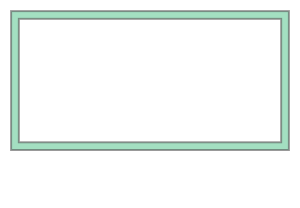

In [50]:
frame

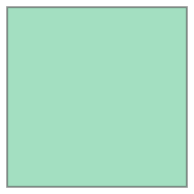

In [63]:
from shapely.geometry import box

# Specify the bbox extent (lower-left corner coordinates and upper-right corner coordinates)
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using Shapely
east_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

east_poly

We can again access different attributes directly from the Polygon object itself that can be really useful for many analyses, such as area, centroid, bounding box, exterior, and exterior-length. See a full list of methods in the Shapely User Manual.

Here, we can see a few of the available attributes and how to access them:

In [52]:
# Print the outputs
print(f"Polygon centroid: {frame.centroid}")
print(f"Polygon Area: {frame.area}")
print(f"Polygon Bounding Box: {frame.bounds}")
print(f"Polygon Exterior: {frame.exterior}")
print(f"Polygon Exterior Length: {frame.exterior.length}")

Polygon centroid: POINT (0 0)
Polygon Area: 10400.0
Polygon Bounding Box: (-180.0, -90.0, 180.0, 90.0)
Polygon Exterior: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon Exterior Length: 1080.0


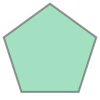

In [54]:
Polygon([(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)])

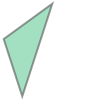

In [55]:
Polygon([(30, 2.01), (28.82, -1.63), (28.09, 0.62)])

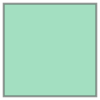

In [58]:
Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])

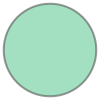

In [59]:
# Circle (using a buffer around a point)
point = Point((0,0))
point.buffer(1)

### Geometry collections (optional)

In some occassions it is useful to store multiple geometries (for example, several points or several polygons) in a single feature. A practical example would be a country that is composed of several islands. In such case, all these polygons share the same attributes on the country-level and it might be reasonable to store that country as geometry collection that contains all the polygons. The attribute table would then contain one row of information with country-level attributes, and the geometry related to those attributes would represent several polygon.

In Shapely, collections of points are implemented by using a MultiPoint -object, collections of curves by using a MultiLineString -object, and collections of surfaces by a MultiPolygon -object.

In [60]:
# Import constructors for creating geometry collections
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

In [69]:
# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3, (5, 5), (3, 9.2), (19.5, 5)])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# Print object definitions
print(multi_point)
print(multi_line)

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456, 5 5, 3 9.2, 19.5 5)
MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


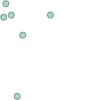

In [70]:
multi_point

### Convex hull and envelope¶
Convex hull refers to the smalles possible polygon that contains all objects in a collection. Alongside with the minimum bounding box, convex hull is a useful shape when aiming to describe the extent of your data.

Let’s create a convex hull around our multi_point object:

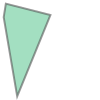

In [71]:
# Convex Hull (smallest polygon around the geometry collection)
multi_point.convex_hull

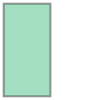

In [72]:
# Envelope (smalles rectangular polygon around the geometry collection): 
multi_point.envelope

### Other useful attributes
lenght of the geometry collection:

In [76]:
print(f"Number of objects in our MultiLine: {len(multi_point.geoms)}")


Number of objects in our MultiLine: 6


Finally, we can check if we have a “valid” MultiPolygon. MultiPolygon is thought as valid if the individual polygons does notintersect with each other. Here, because the polygons have a common 0-meridian, we should NOT have a valid polygon. We can check the validity of an object from the is_valid -attribute that tells if the polygons or lines intersect with each other. This can be really useful information when trying to find topological errors from your data:

In [83]:
#print(f"Is polygon valid?: {multi_poly.is_valid}")